## Importing the required libraries

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [7]:
import tensorflow as tf
from keras.layers import Dropout
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dense,MaxPooling2D,Conv2D
from keras.models import Model
from keras.layers import Input,Activation,Add
from keras.regularizers import l2
from keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

## Extract Files From The Dataset

In [8]:
fldr = "./UTKFace"
import os
files = os.listdir(fldr)

## Creating List Of Images From the Dataset

In [9]:
ages=[]
genders=[]
images=[]
for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = fldr+'/'+fle
    # print(total)
    image = cv2.imread(total)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)

## Creating List Of Age And Gender From Dataset

In [10]:
for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

## Viewing a Sample

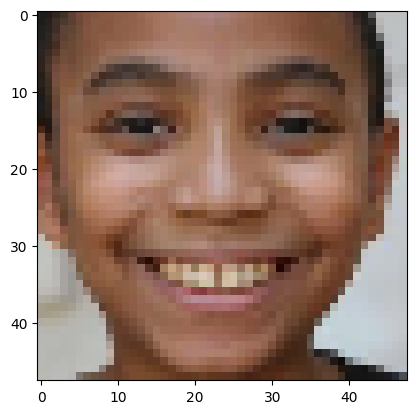

In [11]:
plt.imshow(images[87])

In [12]:
print(ages[87])
print(genders[87])

10
0


## Saving Images,Ages,Genders array in the system

In [13]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [14]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

## Finding The Number Of Male and Female Samples

In [15]:
values,counts = np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


## Plotting The Number Of Male and Female Samples

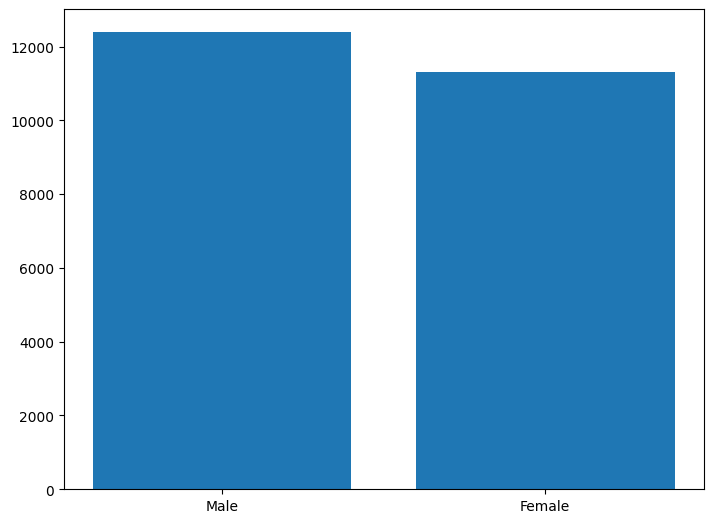

In [16]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender = ['Male','Female']
values = [12391,11317]
ax.bar(gender,values)
plt.show()


## Finding The Number OF Samples in each Age

In [17]:
values,counts = np.unique(ages_f,return_counts=True)
print(counts)
# print(values)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


## Converting The Values and Counts to list

In [18]:
val = values.tolist()
cnt = counts.tolist()

## Plotting The Samples Agewise

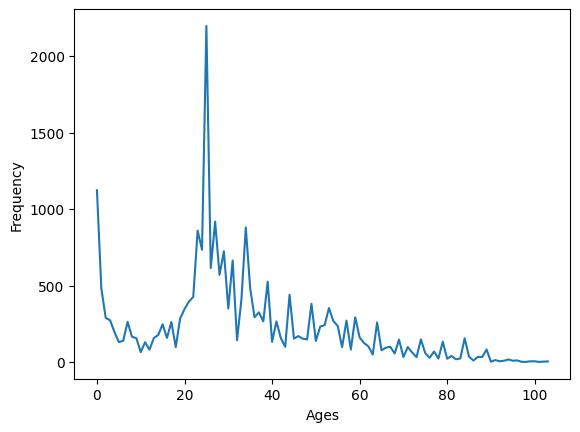

In [19]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

## Defining Labels For Output

In [20]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

## Creating Another List Of Images From The Existing One
### For Better Learning

In [21]:
images_f_2 = images_f/255


In [22]:
images_f_2.shape

(23708, 48, 48, 3)

In [23]:
labels_f=np.array(labels)

## Splitting The Dataset Into Train and Test

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(images_f_2,labels_f,test_size=0.25)

In [26]:
Y_train[0:5]

array([[57,  0],
       [17,  1],
       [42,  1],
       [35,  0],
       [24,  1]])

## Splitting Y_train and Y_test further 
### for better understanding

In [27]:
Y_train_2 = [Y_train[:,1],Y_train[:,0]]
Y_test_2 = [Y_test[:,1],Y_test[:,0]]

In [56]:
Y_train_2[0][0:5]
Y_train_2[1][0:5]

array([57, 17, 42, 35, 24])

## Defining The Model

In [29]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [30]:
def model(input_shape):
    inputs = Input((input_shape))
    conv_1 = Convolution(inputs,32)
    maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3 = Convolution(maxp_2,128)
    maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64,activation='relu')(flatten)
    dense_2 = Dense(64,activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2 = Dense(1,activation='relu',name='age_out')(drop_2)
    model = Model(inputs=inputs,outputs=[output_1,output_2])
    model.compile(loss=['binary_crossentropy','mae'],optimizer='Adam',metrics=['accuracy'])
    return model

In [31]:
Modle = model((48,48,3))

In [32]:
Modle.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 48, 48, 32)   896         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 48, 48, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 48, 48, 32)   0           ['dropout[0][0]']                
                                                                                              

In [58]:
from keras.callbacks import ModelCheckpoint

## Initializing the Model

In [59]:
fle_s = "Age_Sex_Detector.h5"
checkpoint = ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop = tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights=True)
callback_list = [checkpoint,Early_stop]

## Running The Model
### This will Take Some Time(took 583 mins)

In [35]:
History = Modle.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250
278/278 [==============================] - ETA: 0s - loss: 17.5886 - sex_out_loss: 0.6974 - age_out_loss: 16.7301 - sex_out_accuracy: 0.5410 - age_out_accuracy: 0.0463
Epoch 1: val_loss improved from inf to 19.95556, saving model to Age_Sex_Detector.h5
278/278 [==============================] - 201s 715ms/step - loss: 17.5886 - sex_out_loss: 0.6974 - age_out_loss: 16.7301 - sex_out_accuracy: 0.5410 - age_out_accuracy: 0.0463 - val_loss: 19.9556 - val_sex_out_loss: 0.6927 - val_age_out_loss: 19.1261 - val_sex_out_accuracy: 0.5235 - val_age_out_accuracy: 0.0486
Epoch 2/250
278/278 [==============================] - ETA: 0s - loss: 15.3438 - sex_out_loss: 0.6875 - age_out_loss: 14.5149 - sex_out_accuracy: 0.5618 - age_out_accuracy: 0.0470
Epoch 2: val_loss improved from 19.95556 to 13.87068, saving model to Age_Sex_Detector.h5
278/278 [==============================] - 98s 353ms/step - loss: 15.3438 - sex_out_loss: 0.6875 - age_out_loss: 14.5149 - sex_out_accuracy: 0.5618 - ag

## Model Evaluation

In [36]:
Modle.evaluate(X_test,Y_test_2)

186/186 [==============================] - 4s 23ms/step - loss: 7.4823 - sex_out_loss: 0.2525 - age_out_loss: 6.2697 - sex_out_accuracy: 0.8895 - age_out_accuracy: 0.0486


[7.482327461242676,
 0.2524820566177368,
 6.269696235656738,
 0.8894887566566467,
 0.048591192811727524]

In [37]:
pred = Modle.predict(X_test)

186/186 [==============================] - 5s 23ms/step


In [38]:
pred[1]

array([[25.95457 ],
       [19.787327],
       [39.693928],
       ...,
       [73.37262 ],
       [27.362339],
       [25.168686]], dtype=float32)

## Plotting Loss


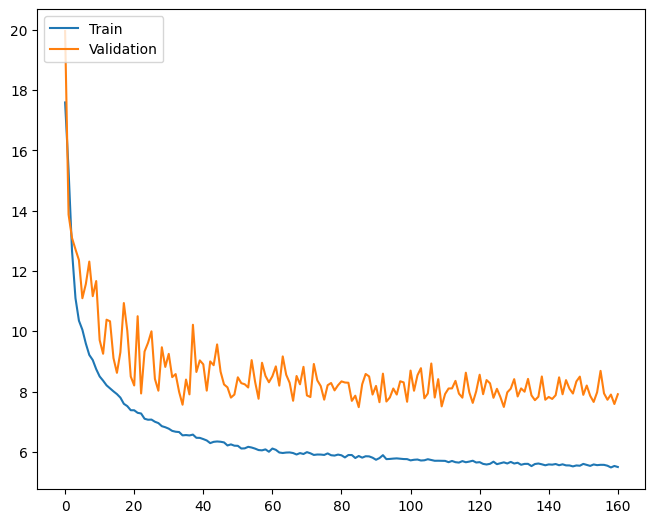

In [39]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title = ('Model Loss')
plt.xlabel = ('Epochs')
plt.ylabel = ('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


## Plotting Sex Accuracy

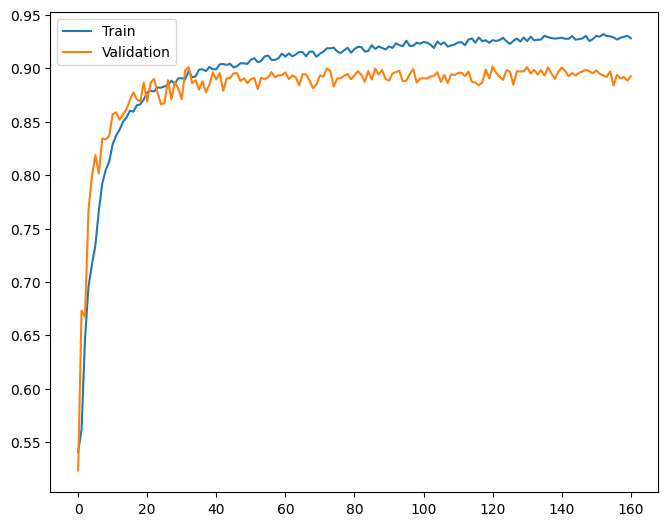

In [40]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title = ('Model Accuracy')
plt.xlabel = ('Epoch')
plt.ylabel = ('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


## Plotting Age Accuracy

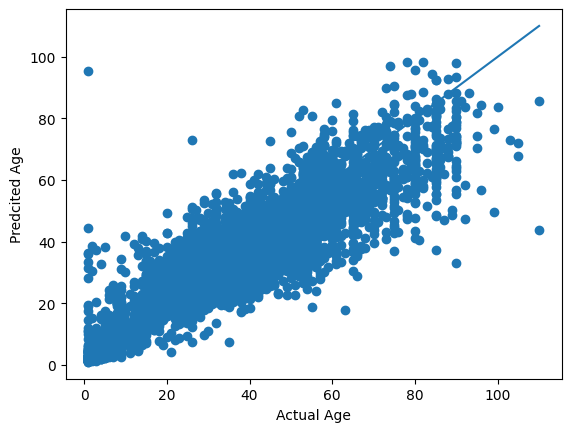

In [41]:
fig,ax = plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()])
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predcited Age')
plt.show()

## Making Report Of The Model (Gender Only)

In [42]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [44]:
report = classification_report(Y_test_2[0],Pred_l)

In [45]:
print(report)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      3103
           1       0.87      0.90      0.89      2824

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



## Making Heatmap Of The Model (Gender Only)

In [46]:
results = confusion_matrix(Y_test_2[0],Pred_l)

<Axes: >

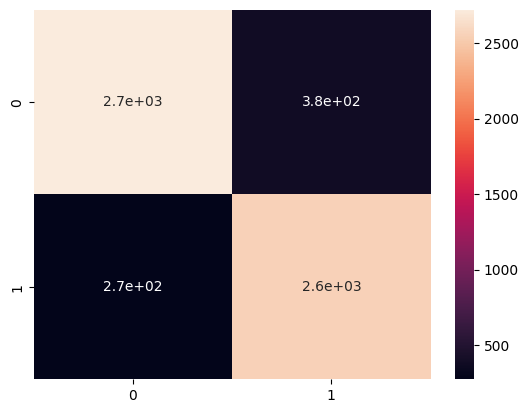

In [47]:
import seaborn as sns
sns.heatmap(results,annot=True)

## Testing the images ourself

In [48]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test = images_f_2[ind]
    pred_l = Model.predict(np.array([image_test]))
    sex_f = ['Male','Female']
    age = int(np.round(pred_l[1][0]))
    sex = int(np.round(pred_l[0][0]))
    print("Predicted Age is "+str(age))
    print("Predicted Gender is "+sex_f[sex])
    

### Test-1
Error in age in this case(Might be)

1/1 [==============================] - 0s 60ms/step
Predicted Age is 95
Predicted Gender is Female


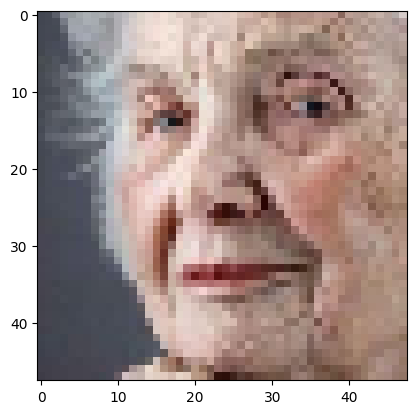

In [49]:
test_image(4,images_f,images_f_2,Modle)


### Test-2

1/1 [==============================] - 0s 27ms/step
Predicted Age is 16
Predicted Gender is Male


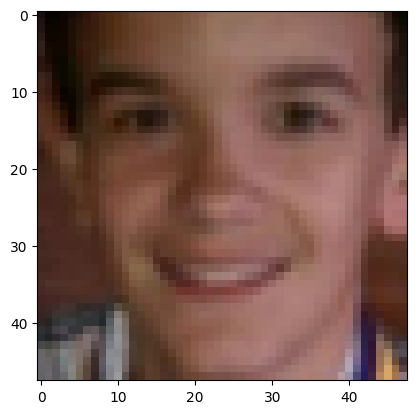

In [50]:
test_image(23,images_f,images_f_2,Modle)

### Test-3

1/1 [==============================] - 0s 40ms/step
Predicted Age is 10
Predicted Gender is Female


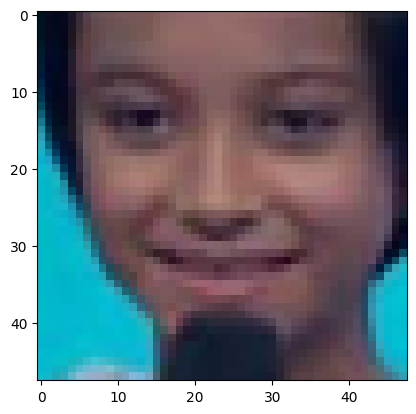

In [51]:
test_image(168,images_f,images_f_2,Modle)

### Test-4

1/1 [==============================] - 0s 68ms/step
Predicted Age is 17
Predicted Gender is Male


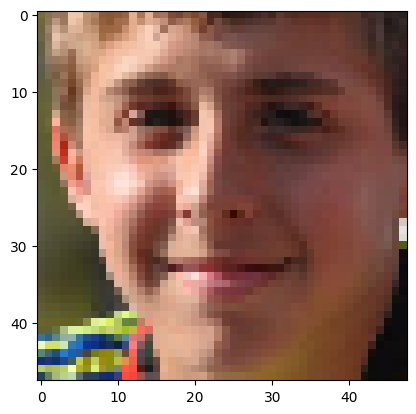

In [52]:
test_image(888,images_f,images_f_2,Modle)

### Test-5
Error in age in this case(Might be)

1/1 [==============================] - 0s 31ms/step
Predicted Age is 17
Predicted Gender is Female


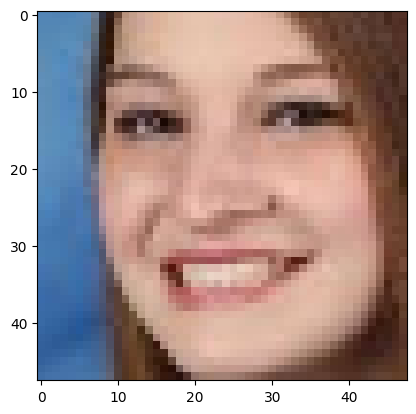

In [53]:
test_image(1288,images_f,images_f_2,Modle)

### Test-6

1/1 [==============================] - 0s 213ms/step
Predicted Age is 23
Predicted Gender is Male


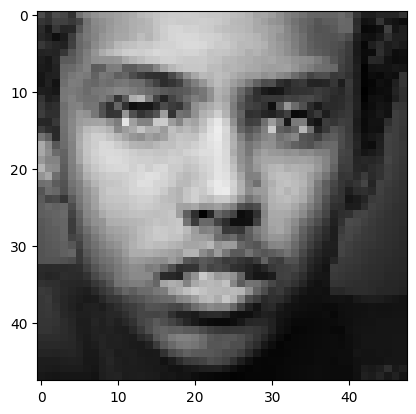

In [57]:
test_image(684,images_f,images_f_2,Modle)